In [ ]:
# https://www.kaggle.com/competitions/cyprus-cars-price-oracle

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("/kaggle/input/cyprus-cars-price-oracle/train.csv")
test = pd.read_csv("/kaggle/input/cyprus-cars-price-oracle/test.csv")
subm = pd.read_csv("/kaggle/input/cyprus-cars-price-oracle/sample_submission.csv")

train.shape, test.shape, subm.shape

((728, 16), (91, 16), (91, 2))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            728 non-null    float64
 1   title            728 non-null    object 
 2   location         728 non-null    object 
 3   Year             728 non-null    int64  
 4   Doors            686 non-null    object 
 5   Drive            667 non-null    object 
 6   Seats            721 non-null    float64
 7   Colour           728 non-null    object 
 8   Gearbox          718 non-null    object 
 9   Mileage (in km)  721 non-null    float64
 10  MOT till         586 non-null    object 
 11  Body type        721 non-null    object 
 12  Fuel type        719 non-null    object 
 13  Engine size      728 non-null    object 
 14  Power            319 non-null    float64
 15  Extras           604 non-null    object 
dtypes: float64(4), int64(1), object(11)
memory usage: 91.1+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               91 non-null     int64  
 1   title            91 non-null     object 
 2   location         91 non-null     object 
 3   Year             91 non-null     int64  
 4   Doors            84 non-null     object 
 5   Drive            83 non-null     object 
 6   Seats            89 non-null     float64
 7   Colour           91 non-null     object 
 8   Gearbox          89 non-null     object 
 9   Mileage (in km)  89 non-null     float64
 10  MOT till         68 non-null     object 
 11  Body type        89 non-null     object 
 12  Fuel type        89 non-null     object 
 13  Engine size      91 non-null     object 
 14  Power            47 non-null     float64
 15  Extras           73 non-null     object 
dtypes: float64(3), int64(2), object(11)
memory usage: 11.5+ KB


In [5]:
os.stat('/kaggle/input/cyprus-cars-price-oracle/train.csv')

os.stat_result(st_mode=33188, st_ino=77614159013, st_dev=51, st_nlink=1, st_uid=65534, st_gid=65534, st_size=213348, st_atime=1770220643, st_mtime=1770154548, st_ctime=1770154548)

In [6]:
os.stat('/kaggle/input/cyprus-cars-price-oracle/test.csv')

os.stat_result(st_mode=33188, st_ino=77614159015, st_dev=51, st_nlink=1, st_uid=65534, st_gid=65534, st_size=26031, st_atime=1770220643, st_mtime=1770154548, st_ctime=1770154548)

In [7]:
train.head(3)

,price,title,location,Year,Doors,Drive,Seats,Colour,Gearbox,Mileage (in km),MOT till,Body type,Fuel type,Engine size,Power,Extras
0,7500.0,"BMW 1-Series 1,6L 2014","Limassol, Germasogeia",2014,4 - 5 doors,Rear (RWD),5.0,White,Automatic,122000.0,11/2027,Hatchback,Petrol,"1,6L",150.0,"Alloy wheels, Keyless start, Start/stop, Foldi..."
1,24000.0,"Land Rover Range Rover Sport 3,0L 2014","Famagusta, Agia Napa",2014,4 - 5 doors,"4WD, AWD",5.0,White,Automatic,96000.0,10/2027,SUV,Diesel,"3,0L",306.0,"Alloy wheels, Cruise control, Keyless start, R..."
2,12800.0,"Renault Captur 1,5L 2019","Nicosia, Kokkinotrimithia",2019,4 - 5 doors,Front (FWD),5.0,Red,Automatic,97357.0,12/2027,SUV,Diesel,"1,5L",NaN,"Alloy wheels, Cruise control, Keyless start, R..."


In [8]:
dict([(c, train[c].nunique()) for c in train.columns])

{'price': 363,
 'title': 603,
 'location': 135,
 'Year': 36,
 'Doors': 3,
 'Drive': 3,
 'Seats': 7,
 'Colour': 15,
 'Gearbox': 2,
 'Mileage (in km)': 441,
 'MOT till': 47,
 'Body type': 8,
 'Fuel type': 6,
 'Engine size': 45,
 'Power': 156,
 'Extras': 403}

In [9]:
train[train['Engine size'].apply(lambda x: False if x=='Electric' or (x[-1]=='L' and len(x)==4) else True)]

,price,title,location,Year,Doors,Drive,Seats,Colour,Gearbox,Mileage (in km),MOT till,Body type,Fuel type,Engine size,Power,Extras
113,3800.0,Sym adx 125,"Larnaca, Larnaka - Skala",2025,NaN,NaN,NaN,Black,NaN,NaN,NaN,NaN,NaN,49-125 cc,NaN,NaN
200,7500.0,Scooter bmw-c650 gt,"Larnaca, Athienou",2012,NaN,NaN,NaN,Gold,NaN,NaN,NaN,NaN,NaN,601-1000 cc,NaN,NaN
331,1100.0,Adly gta125 σε άριστη κατάσταση. πληρωμενα ολα...,"Nicosia, Agios Epifanios Oreinis",2012,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,1000+ cc,NaN,NaN
370,2150.0,Ree 1500 pro 45 delivery rks,"Larnaca, Larnaka - Skala",2024,NaN,NaN,NaN,Black,NaN,NaN,NaN,NaN,NaN,49-125 cc,NaN,NaN
592,650.0,Kymco agility 125 cc,"Paphos, Paphos - Agios Theodoros",2000,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,49-125 cc,NaN,NaN
648,5900.0,Sym scooter 2021,"Limassol, Agios Athanasios",2021,NaN,NaN,NaN,Black,NaN,NaN,NaN,NaN,NaN,401-600 cc,NaN,NaN
685,1500.0,Piaggio mp3,"Larnaca, Aplanta",2009,NaN,NaN,NaN,Silver,NaN,NaN,NaN,NaN,NaN,126-400 cc,NaN,NaN


(array([235., 311., 120.,  34.,  10.,  11.,   0.,   0.,   0.,   7.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

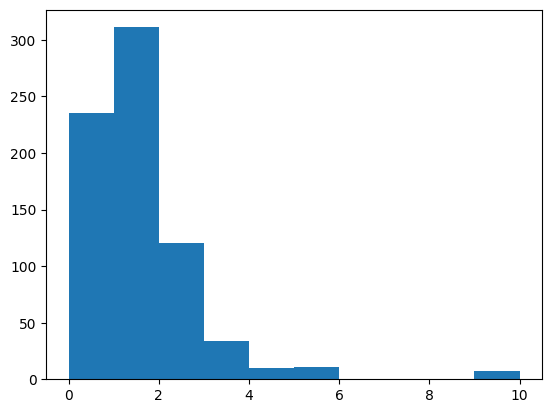

In [10]:
plt.hist(train.isna().sum(axis=1))

(array([29., 37., 18.,  3.,  2.,  0.,  0.,  0.,  0.,  2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

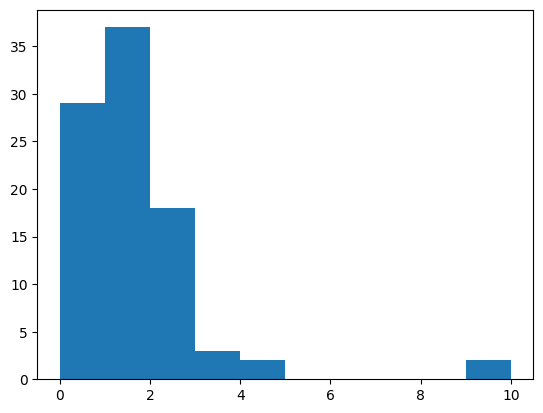

In [11]:
plt.hist(test.isna().sum(axis=1))

In [12]:
test[test['Engine size'].apply(lambda x: False if x=='Electric' or (x[-1]=='L' and len(x)==4) else True)]

,Id,title,location,Year,Doors,Drive,Seats,Colour,Gearbox,Mileage (in km),MOT till,Body type,Fuel type,Engine size,Power,Extras
39,39,Yamaha tmax 560,"Nicosia, Aglantzia",2023,NaN,NaN,NaN,Blue,NaN,NaN,NaN,NaN,NaN,401-600 cc,NaN,NaN
83,83,Honda c 125 supercub 2019. blue,"Limassol, Limassol Marina",2019,NaN,NaN,NaN,Blue,NaN,NaN,NaN,NaN,NaN,49-125 cc,NaN,NaN


In [13]:
train.loc[train['Extras'].isna(), 'Extras'] = ''
test.loc[test['Extras'].isna(), 'Extras'] = ''

In [14]:
extras = set()

for ls in train['Extras'].apply(lambda x: [x.strip() for x in x.split(',')]):
    extras.update(ls)

for ls in test['Extras'].apply(lambda x: [x.strip() for x in x.split(',')]):
    extras.update(ls)

extras = list(extras)
extras.remove('')

len(extras)

19

In [15]:
def process_df(df):
    abnormal_indices = set()
    abnormal_indices.update(df.loc[df.isna().sum(axis=1) > 7].index)
    abnormal_indices.update(df[df['Engine size'].apply(lambda x: False if x=='Electric' or (x[-1]=='L' and len(x)==4) else True)].index)
    df['MOT month'] = df['MOT till'].apply(lambda x: None if x is None or str(x).find('/')==-1 else str(x.split('/')[0]))
    df['MOT year'] = df['MOT till'].apply(lambda x: None if x is None or str(x).find('/')==-1 else str(x.split('/')[1]))
    df['good_location'] = df['location'].apply(lambda x: x.split(',')[0])
    df['good_title'] = df['title'].apply(lambda x: ' '.join(x.split()[:1]))
    df['electric'] = (df['Engine size'] == 'Electric').astype(int)
    df['Engine size'] = df['Engine size'].apply(lambda x: 0 if not (x[-1]=='L' and len(x)==4) else float(x.replace(',', '.')[:-1]))

    extras_df = pd.DataFrame()
    for extra in extras:
        coldf = df['Extras'].apply(lambda x: 1 if x.find(extra)!=-1 else 0)
        coldf.name = extra
        extras_df = pd.concat([extras_df, coldf], axis=1)
    df = pd.concat([df, extras_df], axis=1)

    doors_map = {
        '4 - 5 doors': 4.5,
        '2 - 3 doors': 2.5,
        '6 doors': 6
    }

    df['Doors'] = df['Doors'].map(doors_map).astype(float)
    
    return df, list(abnormal_indices)

In [16]:
train, abtrain = process_df(train)
test, abtest = process_df(test)

len(abtrain), len(abtest)

(7, 2)

In [17]:
features = ['good_location', 'good_title', 'MOT month', 'MOT year', 'Power',
            'Engine size', 'electric', 'Fuel type', 'Body type', 'Mileage (in km)',
            'Gearbox', 'Colour', 'Seats', 'Drive', 'Doors', 'Year'] + extras

cat_features = [c for c in train.select_dtypes('object') if c in features]

target_col = 'price'

len(features), len(cat_features)

(35, 9)

In [18]:
train = train[features + [target_col]]
test = test[features]

train.head(3)

,good_location,good_title,MOT month,MOT year,Power,Engine size,electric,Fuel type,Body type,Mileage (in km),...,Parking Sensors,Rear view camera,Adaptive Cruise Control,Keyless start,Start/stop,Leather seats,Android Auto,Panoramic roof,Heated seats,price
0,Limassol,BMW,11,2027,150.0,1.6,0,Petrol,Hatchback,122000.0,...,0,0,0,1,1,0,0,0,0,7500.0
1,Famagusta,Land,10,2027,306.0,3.0,0,Diesel,SUV,96000.0,...,1,1,1,1,1,1,1,0,1,24000.0
2,Nicosia,Renault,12,2027,NaN,1.5,0,Diesel,SUV,97357.0,...,1,1,1,1,1,1,1,0,1,12800.0


In [19]:
test.head(3)

,good_location,good_title,MOT month,MOT year,Power,Engine size,electric,Fuel type,Body type,Mileage (in km),...,Cruise control,Parking Sensors,Rear view camera,Adaptive Cruise Control,Keyless start,Start/stop,Leather seats,Android Auto,Panoramic roof,Heated seats
0,Larnaca,Mercedes-Benz,12,2027,NaN,3.0,0,Diesel,Saloon,150000.0,...,1,1,1,1,1,1,1,1,1,1
1,Larnaca,Toyota,None,None,NaN,1.5,0,Hybrid Petrol,SUV,54000.0,...,1,1,1,1,1,1,1,1,0,1
2,Limassol,Mercedes-Benz,None,None,NaN,2.0,0,Plug-In Hybrid Petrol,SUV,9000.0,...,1,1,1,1,1,1,1,1,1,1


In [20]:
pd.concat([train.isna().sum(), test.isna().sum()], axis=1)

,0,1
good_location,0,0.0
good_title,0,0.0
MOT month,293,39.0
MOT year,293,39.0
Power,409,44.0
Engine size,0,0.0
electric,0,0.0
Fuel type,9,2.0
Body type,7,2.0
Mileage (in km),7,2.0


In [21]:
def fill_nan_values(df):
    for col in df.select_dtypes('object').columns:
        df.loc[df[col].isna(), col] = "NOINFO"
    return df
    
train = fill_nan_values(train)
test = fill_nan_values(test)

In [22]:
from sklearn.model_selection import KFold
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape

X, y = train[features], np.log(train[target_col])
X_test = test[features]

kfold = KFold(n_splits=5)

model_list, score_list = [], []

params = {
    'iterations': 1000,
    'loss_function': 'MAE',
    'eval_metric': 'MAE',
    'metric_period': 500,
    'max_depth': 4,
    'random_state': 42
}

# for (train_ind, valid_ind) in kfold.split(X):
#     X_train, y_train = X.loc[train_ind], y.loc[train_ind]
#     X_valid, y_valid = X.loc[valid_ind], y.loc[valid_ind]

#     train_pool = Pool(X_train, y_train, cat_features=cat_features)
#     valid_pool = Pool(X_valid, y_valid, cat_features=cat_features)

#     model = CatBoostRegressor(**params)
#     model.fit(train_pool, eval_set=valid_pool)

#     score = mape(y_valid, model.predict(X_valid))
#     print(f'\nSCORE: {score:.5f}\n')

#     model_list.append(model)
#     score_list.append(score)

In [23]:
# np.array(score_list).mean(), np.array(score_list).std()

In [24]:
full_pool = Pool(X, y, cat_features=cat_features)

model = CatBoostRegressor(**params)

model.fit(full_pool)

0:	learn: 0.7761318	total: 55.2ms	remaining: 55.1s
500:	learn: 0.1766752	total: 875ms	remaining: 872ms
999:	learn: 0.1421263	total: 1.74s	remaining: 0us


In [25]:
y_pred = np.exp(model.predict(X_test))

subm['price'] = y_pred

subm.to_csv("submission.csv", index=False)

subm.head()

,Id,price
0,0,26253.564225
1,1,22536.095088
2,2,50925.250554
3,3,37391.130841
4,4,3062.347560
